<center><a target="_blank" href="https://academy.constructor.org/">
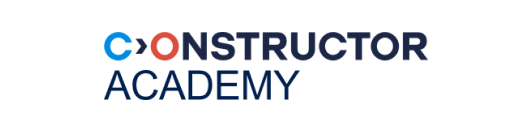</a> </center>
<hr />

# <h1 align="center"> Web Scraping with BeautifulSoup </h1>

<hr />
<center>Constructor Academy, 2025</center>

<!-- Last update: May 14, 2024 DB-->

## Table of Contents

- [1. Introduction to Webscraping](#1.-introduction-to-webscraping)
- [2. HTML Basics](#2.-html-basics)
- [3. The Requests Library](#3.-the-requests-library)
- [4. BeautifulSoup](#4.-beautifulsoup)

We can get a lot of data from several public and paid API's.

1. https://www.who.int/data/gho/  
2. https://data.fivethirtyeight.com/
3. https://data.gov/
4. https://data.unicef.org/
5. https://datasetsearch.research.google.com/

But what if we want to access data not offered this way? Data which we only see though a website's page.

## 1. Introduction to Webscraping

As we all know, the internet is a tremendous source of information, whatever your interest is. Ideally, every piece of interesting data would be available to download in the form of a csv file or equivalent, so that we could read it directly with pandas and start analyzing it. Of course, this is not the case.

The aim of this session is to demonstrate how you can extract information from web pages. This task is called
**Web scraping/web crawling**.

In Python, we use mainly 4 packages for web scraping/crawling:

- **[Requests](https://requests.readthedocs.io/en/master/user/quickstart/)**: is a package that lets you make http requests. In the context of web scraping, it allows you to get the content of a webpage, that can be further analyzed using a html parser.
- **[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)**: is a library that allows you to extract information from html documents (but also xml, even though it is not relevant here.). This is exactly what we need since html is the standard language to write webpages.
- [Selenium](https://selenium-python.readthedocs.io): is a library you can use for web pages that are rendered in real-time (e.g. have to physically click buttons, scroll down, ...).
- [Scrapy](https://scrapy.org): is a library to create web-spiders, scripts that perform web-crawling.

In this course, we learn how to use requests in combination with BeautifulSoup to extract online data. To do so, we first need to understand how information is structured on a web page.

<b> HyperText Markup Language </b> 
(HTML) is a language that web pages are created in.

<a href="https://www.example2.com" > LINK </a>

HTML is not a programming language, like Python — instead, it is a markup language: it tells browsers how to layout content. HTML allows you to do similar things to what you do in a word processor like Microsoft Word — make text bold, create paragraphs, and so on. Because HTML is not a programming language, it is not nearly as complex as Python.

## 2. HTML Basics

HyperText Markup Language (HTML) is a language that web pages are created in. HTML is not a programming language, like Python — instead, it is a **markup language**: it tells browsers how to layout content. HTML allows you to do similar things to what you do in a word processor like Microsoft Word — make text bold, create paragraphs, and so on. Because HTML is not a programming language, it is not nearly as complex as Python.

### The components of a web page

When we visit a web page, our web browser makes a request to a web server. The server then sends back files that tell our browser how to render the page for us. The files fall into 4 main types:

* **HTML** — Contain the main content of the page.
* **CSS** — Add styling to make the page look nicer.
* **JS** — Javascript files add interactivity to web pages.
* **Images** — Image formats, such as JPG and PNG allow web pages to show pictures.


After our browser receives all the files, it renders the page and displays it to us. There's a lot that happens behind the scenes to render a page nicely, but we don't need to worry about most of it when web scraping: we are interested in the main content of the web page: HTML.

You can write html in the code cells of your jupyter notebook by using the `%%HTML` magic. Let's do that:

In [ ]:
%%HTML

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Div Layout</title>
    <style>
        .container {
            display: flex;
        }
        .side-by-side {
            width: 50%;
            box-sizing: border-box;
            border: 2px solid black;
            background-color: lightgray;
            padding: 10px;
        }
        #main-top {
            margin-bottom: 20px;
            border: 2px solid black;
            background-color: lightblue;
            padding: 10px;
            text-align: center;
        }
        a {
            color: darkblue;
            text-decoration: none;
        }
        a:hover {
            text-decoration: underline;
        }
    </style>
</head>
<body>
    <div id="main-top">
        <h1>Main Div at the Top</h1>
        <p>This is a <span>paragraph</span> with some text in the main div. <a href="https://www.example.com" target="_blank">Visit our site</a></p>
    </div>
    <div class="container">
        <div class="side-by-side">
            <h2>Side by Side Div 1</h2>
            <p>This is a <span>paragraph</span> with some text in the first side-by-side div.</p>
        </div>
        <div class="side-by-side">
            <h2>Side by Side Div 2</h2>
            <p>This is a <span>paragraph</span> with some text in the second side-by-side div. Here is a <a href="https://www.example2.com" target="_blank">link</a>.</p>
        </div>
    </div>
</body>
</html>

In [3]:
# //*[@id="vacancy-link-9de7145c-d836-4e00-9b5d-d5f68d83d2ab"]/div

In [2]:
# /html/body/div[1]/div/div/div/div/div[2]/main/aside/div[2]/div[1]/div/div[1]/div/a/div

In [ ]:
## End of HTML example

In HTML, the information is organized in the form of nested elements. Each html element is delimited by tags, for example:

- **`<html>  ... </html>`** is the tag that defines the root element: it tells the web browser that everything inside of it is HTML.
- Right inside the HTML tag, we have **`<head> ... </head>`** and **`<body> ... </body>`** tags.
- The **`<p> ... </p>`** tag defines the paragraph, and any text inside the tag is shown as a separate paragraph.
- the **`<a> ... </a>`** tag declares a link to another webpage. The `href` property determines where the link goes.
- **``<div>``** — Indicates a division, or area, of the page.
- **``<b>``** — Bolds any text inside.
- **``<i>``** — Italicizes any text inside.
- **``<table>``** — Creates a table.
- **``<form>``** — Creates an input form.

Additionally, in HTML, apart from the generic `<div>`, there are specific types of “divs” or elements that help define the structure of a webpage more clearly:

1. **`<header>`**: Used for the top part of a page or section, often containing titles or navigation menus.
2. **`<footer>`**: Defines the bottom part, typically for copyright information or links.
3. **`<article>`**: Represents a self-contained piece of content, like a blog post or news article.
4. **`<section>`**: A generic section, usually with a heading, grouping thematically related content.
5. **`<nav>`**: For navigation links, helping users find different parts of a site.
6. **`<aside>`**: Used for tangentially related content, like sidebars.
7. **`<main>`**: Represents the main content of a page; there should be only one `<main>` per page.
8. **`<figure>` and `<figcaption>`**: For images, diagrams, or code, with `<figcaption>` providing a caption.
9. **`<details>` and `<summary>`**: Creates an expandable and collapsible section, with `<summary>` giving a brief heading.
10. **`<mark>`**: Highlights parts of text for emphasis.

Using these elements helps make your website more accessible and easier to understand, as they provide extra information about the role of each part of your page.

Checkout the full list of tags [here](https://developer.mozilla.org/en-US/docs/Web/HTML/Element).



The best way to learn about html is to explore the source code of actual webpages. You can do that in your browser. The procedure is slightly different depending on web browsers, in google chrome, you can just type `Ctrl`/`Cmd` + `Shift` + `C`. This is the result you have if you visit [Job.ch](https://www.jobs.ch/en/vacancies/?term=Data%20Engineer) (searching for Data Engineer):

<center><a target="_blank" href="https://www.jobs.ch/">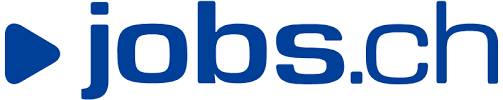</a> </center>

The pannel on the right side of the window shows you the raw html document. You can recognize the tags that we talked about and many more. While webscraping, we will alternate between this window and the jupyter notebook window.

Html elements can also contain **attributes**. Attributes provide extra information about an HTML element. All attributes are made up of two sections − a name and a value. Common attributes include `id`, `title`, `class` and `style`. These attributes are specified within the tags. For example checkout a close up from the same page source code:

![](https://lh3.googleusercontent.com/d/1I6exoU9KIzaXnHk9fC_w0btIMsOXCE7_)

`id` attributes a name to an HTML element, `class` assigns html elements to groups. These properties make elements easier to interact with when we are scraping. One element can have multiple classes, and a class can be shared between elements. Each element can only have one id and it can only be used once on a page. `class` and `id` are optional, and not all elements will have them.

## 3. The Requests Library

The first thing we need to do to scrape a web page is to download it. We can do so using the Python `requests` library. The requests library will make a `GET` request to a web server, which will download the HTML contents of a given web page for us. After running our request, one gets a Response object. This object has a `status_code` property, which indicates if the page was downloaded successfully. A `status_code` of 200 means that the page downloaded successfully. We won't fully dive into status codes here, but a status code starting with a 2 generally indicates success, and a code starting with a 4 or a 5 indicates an error.
The page content can be printed using `page.content`.

In [4]:
import requests

let's start with a simple page:

In [5]:
# making a request to a webpage
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")
print(page)
print(page.status_code) ## prints 200 as status code
print(page.content) ## prints the entire webpage content

<Response [200]>
200
b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'


- When making a request to an external service, your system will need to wait for an answer before moving on.
- By default, requests waits indefinitely, so you should almost always specify a `timeout` duration to prevent your script from getting stuck:

In [6]:
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html", timeout=1)

The `timeout` variable denotes the maximum number of seconds that `requests.get()` will wait for an answer.

Let's see the content for the jobs.ch page:

In [16]:
page = requests.get("https://www.jobs.ch/en/vacancies/detail/9de7145c-d836-4e00-9b5d-d5f68d83d2ab/", timeout=2)
print(page)
print(page.status_code)
print(page.content[:1000])

<Response [200]>
200
b'<!doctype html>\n<html class="legacy"  lang="en">\n  <head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n\n    <!-- No cache for index.html -->\n    \n\n    <title>Data Scientist - Job Offer at SamanTree Medical (Switzerland) SA - jobs.ch</title>\n\n    <!-- Preconnects : only first party origin and used everywhere! -->\n\n    \n\n    \n    <link rel="preconnect" href="//c.jobs.ch" />\n    \n\n    <!-- Fonts -->\n    \n      <link as="font" type="font/woff2" href="/public/fonts/03d2aa5e66b427f22f38.woff2" fetchpriority="high" crossorigin />\n    \n      <link as="font" type="font/woff2" href="/public/fonts/1f8b60e7a2f4cbdb085a.woff2" fetchpriority="high" crossorigin />\n    \n      <link as="font" type="font/woff2" href="/public/fonts/fd84e3051ac1afa72e7a.woff2" fetchpriority="high" crossorigin />\n    \n\n    \n      <!-- Synchronous JS -->\n      <!-- Sentry local -->\n      <script src="/public/lib/

In [8]:
print(len(page.content))

396865


In [17]:
soup = BeautifulSoup(page.content, "html.parser")

In [19]:
soup.get_text()

"\n\n\n\n\n\nData Scientist - Job Offer at SamanTree Medical (Switzerland) SA - jobs.ch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to contentjobs.ch Navigation logoFind a jobSkip to contentExplore companiesCompare salariesRecruiter AreaHire now for free DeutschFrançaisEnglishLoginFind a jobSkip to contentExplore companiesCompare salariesRecruiter AreaHire now for free My accountLoginDon't have an account yet?Sign upSelect LanguageDeutschFrançaisEnglishSimilar jobs Data Scientist SamanTree Medical (Switzerland) SALausanneEasy applySaveKey informationPublication date:24 July 2025Workload:80 – 100%Contract type:Unlimited employmentLanguage:English (Fluent), French (Intermediate)Place of work:Avenue de Provence 12, 1007\xa0LausanneSkillsData SciencePythonTraitement d'images  SamanTree Medical is an innovative Belgian-Swiss medical device company dedicated to improving patient care and operating room efficiency through bre

As you can see, finding elements within `page.content` is difficult. That is where BeautifulSoup will assist us.

## 4. BeautifulSoup

BeautifulSoup is a html and xml parser. It means that it analyses the contents of a html or xml document and provides methods the access specific elements of the document. In this section, we will parse `page.content` using BeautifulSoup and create a pandas dataframe that contains:

- job title
- posting date
- company
- location
- link to job add

### Import libraries and parse the page content

In [9]:
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
}

In [20]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
}
url = "https://www.jobs.ch/en/vacancies/?term=data%20scientist"
page = requests.get(url, headers=headers, timeout=2)
print(page.status_code)
page.content[:10000]

200


b'<!doctype html>\n<html  lang="en">\n  <head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n\n    <!-- No cache for index.html -->\n    \n    <meta http-equiv="Pragma" content="no-cache" />\n    <meta http-equiv="cache-control" content="no-cache, must-revalidate" />\n    \n\n    <title>210 Data scientist jobs - jobs.ch</title>\n\n    <!-- Preconnects : only first party origin and used everywhere! -->\n\n    \n\n    \n    <link rel="preconnect" href="//c.jobs.ch" />\n    \n\n    <!-- Fonts -->\n    \n      <link as="font" type="font/woff2" href="/public/fonts/03d2aa5e66b427f22f38.woff2" fetchpriority="high" crossorigin />\n    \n      <link as="font" type="font/woff2" href="/public/fonts/1f8b60e7a2f4cbdb085a.woff2" fetchpriority="high" crossorigin />\n    \n      <link as="font" type="font/woff2" href="/public/fonts/fd84e3051ac1afa72e7a.woff2" fetchpriority="high" crossorigin />\n    \n\n    \n      <!-- Synchronous JS -->\n 

In [21]:
soup = BeautifulSoup(page.content, "html.parser") # converts the page content into a beautifulsoup object

In [22]:
type(soup)

bs4.BeautifulSoup

In [23]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<!-- No cache for index.html -->
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="no-cache, must-revalidate" http-equiv="cache-control"/>
<title>210 Data scientist jobs - jobs.ch</title>
<!-- Preconnects : only first party origin and used everywhere! -->
<link href="//c.jobs.ch" rel="preconnect"/>
<!-- Fonts -->
<link as="font" crossorigin="" fetchpriority="high" href="/public/fonts/03d2aa5e66b427f22f38.woff2" type="font/woff2"/>
<link as="font" crossorigin="" fetchpriority="high" href="/public/fonts/1f8b60e7a2f4cbdb085a.woff2" type="font/woff2"/>
<link as="font" crossorigin="" fetchpriority="high" href="/public/fonts/fd84e3051ac1afa72e7a.woff2" type="font/woff2"/>
<!-- Synchronous JS -->
<!-- Sentry local -->
<script crossorigin="anonymous" src="/public/lib/sentry_bundle_prod_7.66.0.min.js"></script>
<!-- CSS: put always after sync JS! to

We now have a BeautifoulSoup object that contains all the content of the original webpage in a format that is much easier to access. For example you can extract all the text content of the page by typing:

In [24]:
soup.get_text()

"\n\n\n\n\n\n\n\n210 Data scientist jobs - jobs.ch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to contentjobs.ch Navigation logoFind a jobSkip to contentExplore companiesCompare salariesRecruiter AreaHire now for free DeutschFrançaisEnglishLoginFind a jobSkip to contentExplore companiesCompare salariesRecruiter AreaHire now for free My accountLoginDon't have an account yet?Sign upSelect LanguageDeutschFrançaisEnglishSearchSmart SearchBetaFind better matchesFind better matchesJob title or keywordsdata scientistCity or regionChoose a regionSearchAll filtersPublished sinceWorkloadOccupational fieldContract typeLanguagePositionAll filters210 Data scientist job offersRelevanceNewestRelevance2 weeks agoData ScientistPlace of work:LausanneWorkload:80 – 100%Contract type:Unlimited employment SamanTree Medical (Switzerland) SAEasy applyLast weekPrincipal Machine Learning Engineer\x0cPlace of work:BernWorkload:100%Contract type:

In [25]:
soup.text

"\n\n\n\n\n\n\n\n210 Data scientist jobs - jobs.ch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to contentjobs.ch Navigation logoFind a jobSkip to contentExplore companiesCompare salariesRecruiter AreaHire now for free DeutschFrançaisEnglishLoginFind a jobSkip to contentExplore companiesCompare salariesRecruiter AreaHire now for free My accountLoginDon't have an account yet?Sign upSelect LanguageDeutschFrançaisEnglishSearchSmart SearchBetaFind better matchesFind better matchesJob title or keywordsdata scientistCity or regionChoose a regionSearchAll filtersPublished sinceWorkloadOccupational fieldContract typeLanguagePositionAll filters210 Data scientist job offersRelevanceNewestRelevance2 weeks agoData ScientistPlace of work:LausanneWorkload:80 – 100%Contract type:Unlimited employment SamanTree Medical (Switzerland) SAEasy applyLast weekPrincipal Machine Learning Engineer\x0cPlace of work:BernWorkload:100%Contract type:

You can find the first element that has tag `<a>...</a>` by typing:

In [31]:
soup.find('a').text

'jobs.ch Navigation logo'

In [30]:
# soup.find('div').get_text()

In [28]:
soup.find('title')

<title>210 Data scientist jobs - jobs.ch</title>

In [ ]:
soup.find('a').get_text()

'Skip to content'

And you can find all elements that have tags `<a>...</a>` by typing:

In [37]:
soup.find_all('a')

[<a class="cursor_pointer trs-dur_d125 trs-prop_color trs-tmf_ease-out td_none hover:td_underline c_colorPalette.base hover:c_colorPalette.hover visited:c_colorPalette.visited color-palette_link.brand mr_s16" data-cy="header-logo" href="/en/" title="Home"><span class="ac_center d_inline-block lh_0 va_middle c_white h_[24px] w_[107px]"><span class="pos_absolute w_1px h_1px p_s0 ov_hidden clip_rect(0,_0,_0,_0) white-space_nowrap cp-path_inset(50%) bd_0">jobs.ch Navigation logo</span><svg aria-hidden="true" fill="currentColor" focusable="false" viewbox="0 0 120 24"><path d="m11.8,10.69l-7.8,-4.64c-2.2,-1.21 -4,-0.202 -4,2.42v9.277c0,2.52 1.8,3.63 4,2.32l7.9,-4.64c2.1,-1.31 2.1,-3.427 -0.1,-4.737"></path><path d="m35.9,5.647c-7.6,0 -8.5,1.815 -8.5,7.462s1,7.36 8.5,7.36s8.5,-1.816 8.5,-7.36c0,-5.65 -1,-7.464 -8.5,-7.464m0,12.202c-3.9,0 -4.2,-0.808 -4.2,-4.74s0.3,-4.84 4.2,-4.84s4.2,0.908 4.2,4.84c0,3.83 -0.3,4.74 -4.2,4.74m21,-12.203c-2.2,0 -4.5,0.303 -5.4,2.118h-0.2v-7.156c0,-0.303 -0.3,-0

In [39]:
soup.find('a', {"data-cy": "job-link"}).text

'2 weeks agoData ScientistPlace of work:LausanneWorkload:80 – 100%Contract type:Unlimited employment SamanTree Medical (Switzerland) SAEasy apply'

In [41]:
soup.find('a', {"data-cy": "job-link"}).attrs

{'data-cy': 'job-link',
 'id': 'vacancy-link-9de7145c-d836-4e00-9b5d-d5f68d83d2ab',
 'tabindex': '0',
 'title': 'Data Scientist',
 'class': ['cursor_pointer',
  'trs-dur_d125',
  'trs-prop_color',
  'trs-tmf_ease-out',
  'td_none',
  'c_colorPalette.base',
  'hover:c_colorPalette.hover',
  'visited:c_colorPalette.visited',
  'color-palette_link.brand',
  'd_block',
  'wb_break-word',
  'h_100%',
  'group'],
 'href': '/en/vacancies/detail/9de7145c-d836-4e00-9b5d-d5f68d83d2ab/'}

In [46]:
soup.find('a', {"data-cy": "job-link"}).text

'2 weeks agoData ScientistPlace of work:LausanneWorkload:80 – 100%Contract type:Unlimited employment SamanTree Medical (Switzerland) SAEasy apply'

In [43]:
soup.find('a', {"data-cy": "job-link"}).get('href')

'/en/vacancies/detail/9de7145c-d836-4e00-9b5d-d5f68d83d2ab/'

In [44]:
soup.find('a', {"data-cy": "job-link"}).get('title')

'Data Scientist'

In [45]:
soup.find('title')

<title>210 Data scientist jobs - jobs.ch</title>

In [36]:
soup.find_all('a')[25].text

'5 days ago(Senior) Data Science & Data Analytics Consultant 60-100%Place of work:Zürich, Lausanne, BernWorkload:60 – 100%Contract type:Unlimited employment Eraneos Switzerland AG'

In [48]:
len(soup.find_all('a', {"data-cy": "job-link"}))

20

In [50]:
type(soup.find_all('a', {"data-cy": "job-link"}))

bs4.element.ResultSet

In [51]:
type(soup.find('a', {"data-cy": "job-link"}))

bs4.element.Tag

In [ ]:
soup.find_all('a', {'class': ['A-sc-1q4zv2a-0 gFUeCQ Link-sc-czsz28-2 sc-dcJsrY']})[1]

IndexError: list index out of range

Yet, when we separate the tags with a comma, it instructs the query to find a tag containing at least one of the given values, not necessarily all of them.

In [56]:
soup.find_all('a', {'class': ['A-sc-1q4zv2a-0', 'eMGuAx', 'Link-sc-czsz28-2', 'bzpUGN']})[:1]

[]

If we are trying to be more specific with our query, we can use the `.select()` method. Selectors provide a way to select and manipulate HTML elements based on their id, class, attributes, and hierarchy in the document.

In comparison to `.find()`, `.select()` requires that all the values given in the query are a match.

In [52]:
# soup.select('a.A-sc-1q4zv2a-0.eMGuAx.Link-sc-czsz28-2.bzpUGN')[:1]

Once you have an element of interest, you can extract data using:

In [53]:
# soup.select_one('a.A-sc-1q4zv2a-0.eMGuAx.Link-sc-czsz28-2.bzpUGN').get_text()

In [55]:
# soup.select_one('a.A-sc-1q4zv2a-0.eMGuAx.Link-sc-czsz28-2.bzpUGN').get('href')

Now that we know how to extract data from a webpage, let's find the relevant html elements for our project. We need to locate them in the original page:

### Browse the source code in a web browser

The html code inspector is slightly different depending on your web browser. here we use Chrome. With Chrome, we can select the following icon at the top of the code inspector tab:

![](https://lh3.googleusercontent.com/d/1piq5H0kGqufsgeKQTs5VifXCGwDBVs1e)

This allows us to select any component of the page and find the corresponding element in the html code. Let's do this for the list of jobs:

![](https://lh3.googleusercontent.com/d/1gpxxDzK0WZR73rLGNVIHkHEqP17X1CN_)

After navigating within the html element tree, we observe that each job box is a seperate `div`element and has the `class` attribute `VacancySerpItem__ShadowBox-qr45cp-0`.

![](https://lh3.googleusercontent.com/d/1p3_xg7cS8Era6dl4dHKsePxAtprMNeYR)

Note that websites get updated, so the name of the class might be different by the time you follow this tutorial!

Here, we can get the html element for a job by typing:

In [57]:
one_job_ad = soup.find('div', {'data-cy' : "serp-item"})
one_job_ad

<div class='after:bdr_r16 after:bx-sh_bs50 after:content_"" after:d_block after:h_100% after:isolation_isolate after:left_s0 after:op_0 after:pointer-events_none after:pos_absolute after:top_s0 after:trs-dur_d125 after:trs-prop_opacity after:trs-tmf_ease-out after:w_100% after:will-change_opacity bd_[1px_solid_{colors.brand.60}] hover:after:op_0 active:after:op_0 bdr_r16 h_100% pos_relative' data-cy="serp-item"><a class="cursor_pointer trs-dur_d125 trs-prop_color trs-tmf_ease-out td_none c_colorPalette.base hover:c_colorPalette.hover visited:c_colorPalette.visited color-palette_link.brand d_block wb_break-word h_100% group" data-cy="job-link" href="/en/vacancies/detail/9de7145c-d836-4e00-9b5d-d5f68d83d2ab/" id="vacancy-link-9de7145c-d836-4e00-9b5d-d5f68d83d2ab" tabindex="0" title="Data Scientist"><div class="d_flex bg-c_brand.01 bdr_r16 flex-d_column h_100% p_s16 pos_relative" data-cy="vacancy-serp-item-active"><div class="d_flex jc_space-between mb_s12" data-cy="serp-item-9de7145c-d83

In [58]:
one_job_ad.text

'2 weeks agoData ScientistPlace of work:LausanneWorkload:80 – 100%Contract type:Unlimited employment SamanTree Medical (Switzerland) SAEasy apply'

To find all of them, we can write:

In [59]:
job_ads = soup.find_all('div', {'data-cy' : "serp-item"})

In [60]:
len(job_ads)

20

we obtain a list of 23 job ads! Each component of the list contains the html element describing the job ad:

In [62]:
job_ads[0].text

'2 weeks agoData ScientistPlace of work:LausanneWorkload:80 – 100%Contract type:Unlimited employment SamanTree Medical (Switzerland) SAEasy apply'

In [61]:
job_ads[0]

<div class='after:bdr_r16 after:bx-sh_bs50 after:content_"" after:d_block after:h_100% after:isolation_isolate after:left_s0 after:op_0 after:pointer-events_none after:pos_absolute after:top_s0 after:trs-dur_d125 after:trs-prop_opacity after:trs-tmf_ease-out after:w_100% after:will-change_opacity bd_[1px_solid_{colors.brand.60}] hover:after:op_0 active:after:op_0 bdr_r16 h_100% pos_relative' data-cy="serp-item"><a class="cursor_pointer trs-dur_d125 trs-prop_color trs-tmf_ease-out td_none c_colorPalette.base hover:c_colorPalette.hover visited:c_colorPalette.visited color-palette_link.brand d_block wb_break-word h_100% group" data-cy="job-link" href="/en/vacancies/detail/9de7145c-d836-4e00-9b5d-d5f68d83d2ab/" id="vacancy-link-9de7145c-d836-4e00-9b5d-d5f68d83d2ab" tabindex="0" title="Data Scientist"><div class="d_flex bg-c_brand.01 bdr_r16 flex-d_column h_100% p_s16 pos_relative" data-cy="vacancy-serp-item-active"><div class="d_flex jc_space-between mb_s12" data-cy="serp-item-9de7145c-d83

now that we have identified the data blocks for jobs, we can extract the individual pieces of information. Let's start with the link to the job ad. This will be located within a `<a>` tag, and we are interested in the `href` attribute:

In [66]:
job_ads[0].find('a').get('href')

'/en/vacancies/detail/9de7145c-d836-4e00-9b5d-d5f68d83d2ab/'

Obtaining the link can be done without specifying any attribute, as that is the sole content of the `a` tag in one job-ad box. However, it is advisable to specify the attribute to prevent confusion or in cases where there could be more than one `a` tag.

In [67]:
job_ads[0].find('a', {'data-cy': 'job-link'}).get('href')

'/en/vacancies/detail/9de7145c-d836-4e00-9b5d-d5f68d83d2ab/'

In [68]:
'https://www.jobs.ch' + job_ads[0].find('a', {'data-cy': 'job-link'}).get('href')

'https://www.jobs.ch/en/vacancies/detail/9de7145c-d836-4e00-9b5d-d5f68d83d2ab/'

In [70]:
# requests.get('https://www.jobs.ch' + job_ads[0].find('a', {'data-cy': 'job-link'}).get('href'))

We get the link to the job ad page but to access the page from outside, we need to add 'https://www.jobs.ch' as prefix:

In [69]:
'https://www.jobs.ch' + job_ads[0].find('a',{'data-cy' : 'job-link'}).get('href')

'https://www.jobs.ch/en/vacancies/detail/9de7145c-d836-4e00-9b5d-d5f68d83d2ab/'

let's check it works for other links:

In [72]:
list_joblinks = []
for one_job in job_ads:
    list_joblinks.append('https://www.jobs.ch' + one_job.find('a',{'data-cy' : 'job-link'}).get('href'))


    

In [73]:
list_joblinks

['https://www.jobs.ch/en/vacancies/detail/9de7145c-d836-4e00-9b5d-d5f68d83d2ab/',
 'https://www.jobs.ch/en/vacancies/detail/d59c316b-8aa2-46af-80da-e69c5b0429e4/',
 'https://www.jobs.ch/en/vacancies/detail/ef10c72e-4036-4003-9d53-7d4506ae97c9/',
 'https://www.jobs.ch/en/vacancies/detail/04c4d29e-3e85-40ab-a240-a554f5bc6956/',
 'https://www.jobs.ch/en/vacancies/detail/2bd5fe01-6578-4f61-9f65-60c78bdea265/',
 'https://www.jobs.ch/en/vacancies/detail/458511d8-5568-4927-bf71-50bfba735a8b/',
 'https://www.jobs.ch/en/vacancies/detail/97aafa5b-0aac-4198-b784-b67b81b529c2/',
 'https://www.jobs.ch/en/vacancies/detail/5db6db8f-fa05-4456-ad0a-3c317ad00001/',
 'https://www.jobs.ch/en/vacancies/detail/53fa846d-bd0d-4ec2-94ac-c067bd11b372/',
 'https://www.jobs.ch/en/vacancies/detail/2a56d90d-aa8a-4e66-9b6a-a56901c79fbf/',
 'https://www.jobs.ch/en/vacancies/detail/acaa5589-8677-4dc3-a8e2-9f0ad2f7a758/',
 'https://www.jobs.ch/en/vacancies/detail/aeb1d50a-523d-4413-bc88-b271df9117c9/',
 'https://www.jo

In [74]:
['https://www.jobs.ch' + job.find('a',{'data-cy' : 'job-link'}).get('href') for job in job_ads]

['https://www.jobs.ch/en/vacancies/detail/9de7145c-d836-4e00-9b5d-d5f68d83d2ab/',
 'https://www.jobs.ch/en/vacancies/detail/d59c316b-8aa2-46af-80da-e69c5b0429e4/',
 'https://www.jobs.ch/en/vacancies/detail/ef10c72e-4036-4003-9d53-7d4506ae97c9/',
 'https://www.jobs.ch/en/vacancies/detail/04c4d29e-3e85-40ab-a240-a554f5bc6956/',
 'https://www.jobs.ch/en/vacancies/detail/2bd5fe01-6578-4f61-9f65-60c78bdea265/',
 'https://www.jobs.ch/en/vacancies/detail/458511d8-5568-4927-bf71-50bfba735a8b/',
 'https://www.jobs.ch/en/vacancies/detail/97aafa5b-0aac-4198-b784-b67b81b529c2/',
 'https://www.jobs.ch/en/vacancies/detail/5db6db8f-fa05-4456-ad0a-3c317ad00001/',
 'https://www.jobs.ch/en/vacancies/detail/53fa846d-bd0d-4ec2-94ac-c067bd11b372/',
 'https://www.jobs.ch/en/vacancies/detail/2a56d90d-aa8a-4e66-9b6a-a56901c79fbf/',
 'https://www.jobs.ch/en/vacancies/detail/acaa5589-8677-4dc3-a8e2-9f0ad2f7a758/',
 'https://www.jobs.ch/en/vacancies/detail/aeb1d50a-523d-4413-bc88-b271df9117c9/',
 'https://www.jo

now we can see that in the `<a>`element, we have an attribute called title, which corresponds the the title of the ad:

In [77]:
job_ads[0].find('a',{'data-cy' : 'job-link'}).attrs

{'data-cy': 'job-link',
 'id': 'vacancy-link-9de7145c-d836-4e00-9b5d-d5f68d83d2ab',
 'tabindex': '0',
 'title': 'Data Scientist',
 'class': ['cursor_pointer',
  'trs-dur_d125',
  'trs-prop_color',
  'trs-tmf_ease-out',
  'td_none',
  'c_colorPalette.base',
  'hover:c_colorPalette.hover',
  'visited:c_colorPalette.visited',
  'color-palette_link.brand',
  'd_block',
  'wb_break-word',
  'h_100%',
  'group'],
 'href': '/en/vacancies/detail/9de7145c-d836-4e00-9b5d-d5f68d83d2ab/'}

In [78]:
job_ads[0].find('a',{'data-cy' : 'job-link'}).get('title')

'Data Scientist'

In [87]:
job_ads[0].find('span', {'class': ['c_gray.90']}).text

'Data Scientist'

However, we require additional details about the job posting. Upon examining the child tags, we observe that the remaining information is encapsulated within `p` tags. Regardless of whether these `p` tags contain further tags as a child or not, we can still retrieve the text from the child taga, if they exist.

In [99]:
job_ads[0].find_all('p', {'class': ['mb_s12', 'lastOfType:mb_s0', 'textStyle_p2']})

[<p class="mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.50 max-w_[min-content] white-space_nowrap">2 weeks ago</p>,
 <p class="mb_s12 lastOfType:mb_s0 textStyle_p2">Lausanne</p>,
 <p class="mb_s12 lastOfType:mb_s0 textStyle_p2">80 – 100%</p>,
 <p class="mb_s12 lastOfType:mb_s0 textStyle_p2">Unlimited employment</p>,
 <p class="mb_s12 lastOfType:mb_s0 textStyle_p2 c_gray.90"><strong>SamanTree Medical (Switzerland) SA</strong></p>]

In [91]:
date = job_ads[0].find_all('p')[0].text
date

'2 weeks ago'

In [93]:
location = job_ads[0].find_all('p')[1].text
location

'Lausanne'

In [94]:
workload = job_ads[0].find_all('p')[2].text
workload

'80 – 100%'

In [95]:
emp_type = job_ads[0].find_all('p')[3].text
emp_type

'Unlimited employment'

In [96]:
company = job_ads[0].find_all('p')[4].text
company

'SamanTree Medical (Switzerland) SA'

In [100]:
# job_ads[0].find_all('p', {'class' : 'Span-sc-1ybanni-0'})

This way, we notice that it always come in the following order:

- job title
- company
- location
- date of publication

we can then extract the data using `find_all` and `.get_text()`:

In [101]:
for section in job_ads[0].find_all('p', {'class': ['mb_s12', 'lastOfType:mb_s0', 'textStyle_p2']}):
    print(section.get_text())

2 weeks ago
Lausanne
80 – 100%
Unlimited employment
SamanTree Medical (Switzerland) SA


However, some items may not display the information in a suitable format, such as the date in this example. This is why we might need to scrape each tag independently in certain cases. It all depends on how the data is presented.

In [102]:
# job_ads[0].select_one('p > span.ftUOUz')

In [104]:
# job_ads[0].select_one('p > span.ftUOUz').find_next()

Now, we can programmatically create a dataframe containing all the job posts found on the scraped page.

In [112]:
import time

In [114]:
time.sleep(2)

In [127]:
url = f"https://www.jobs.ch/en/vacancies/?term={processed_profesion}"

time.sleep(0.6)
page = requests.get(url, headers=headers, timeout=2)
soup = BeautifulSoup(page.content, "html.parser")
# max_pages = int(soup.find_all('span', {'tabindex':"-1"})[-1].text)

In [131]:
soup.find_all('span', {'tabindex':"-1"})[-2].text.split()[1]

'11'

In [133]:
soup.find_all('span', {'tabindex':"-1"})[-2].text.split()

['...', '11']

In [136]:
import pandas as pd
import time

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
}

profession = "Data Scientist"


processed_profesion = profession.lower().replace(" ", "%20")


df = pd.DataFrame(columns=['profession', 'title', 'link', 'date', 'location', 'workload','emp_type', 'company'])



# for loop for profession

# to get the page number of the profession
url = f"https://www.jobs.ch/en/vacancies/?term={processed_profesion}"

time.sleep(0.6)
page = requests.get(url, headers=headers, timeout=2)
soup = BeautifulSoup(page.content, "html.parser")
max_pages = int(soup.find_all('span', {'tabindex':"-1"})[-2].text.split()[1])


for page in range(1,max_pages+1):
        
    url = f"https://www.jobs.ch/en/vacancies/?page={page}&term={processed_profesion}"
    
    time.sleep(0.6)
    page = requests.get(url, headers=headers, timeout=2)
    soup = BeautifulSoup(page.content, "html.parser")
    
    job_ads = soup.find_all('div', {'data-cy' : "serp-item"})
    
    
    for job in job_ads:
        title = job.find('a',{'data-cy' : 'job-link'}).get('title')
        link = 'https://www.jobs.ch' + job.find('a',{'data-cy' : 'job-link'}).get('href')
    
        
        date = job.find_all('p')[0].text
        try:
            location = job.find_all('p')[1].text
        except IndexError:
            location = ''
    
        try:
            workload = job.find_all('p')[2].text
        except IndexError:
            workload = ''
        try:    
            emp_type = job.find_all('p')[3].text
        except IndexError:
            emp_type = ''
        try:
            company = job.find_all('p')[4].text
        except (IndexError, AttributeError):
            company = ''
    
        
        job_dict = {
                    "profession": profession,
                    "title": title,
                    "link" : link,
                    "date": date,
                  "location": location,
                    "workload": workload,
                    "emp_type": emp_type,
                    "company": company,
                }
    
        df = pd.concat(
            [df, pd.DataFrame([job_dict])],ignore_index =True
        )

df.to_csv(f"{profession}_jobs.csv", index = False)
df



,profession,title,link,date,location,workload,emp_type,company
0,Data Scientist,Data Scientist,https://www.jobs.ch/en/vacancies/detail/9de714...,2 weeks ago,Lausanne,80 – 100%,Unlimited employment,SamanTree Medical (Switzerland) SA
1,Data Scientist,Principal Machine Learning Engineer,https://www.jobs.ch/en/vacancies/detail/d59c31...,Last week,Bern,100%,Unlimited employment,machineMD AG
2,Data Scientist,Head of Data Engineering (f/m/d) | 80-100% | H...,https://www.jobs.ch/en/vacancies/detail/ef10c7...,Last week,Zürich,80 – 100%,Unlimited employment,SMG Swiss Marketplace Group
3,Data Scientist,Spezialist Ereignisanalyse und Erfahrungsauswe...,https://www.jobs.ch/en/vacancies/detail/04c4d2...,2 days ago,Kernkraftwerk Gösgen-Däniken AG,100%,Unlimited employment,Kernkraftwerk Gösgen-Däniken
4,Data Scientist,ML / Data Science Specialist (80-100%),https://www.jobs.ch/en/vacancies/detail/2bd5fe...,9 hours ago,Bern,80 – 100%,Unlimited employment,DV Bern
...,...,...,...,...,...,...,...,...
204,Data Scientist,Sr. Global Program Safety Team Lead (Immunology),https://www.jobs.ch/en/vacancies/detail/b2c192...,2 quarters ago,East Hanover,100%,Novartis AG,
205,Data Scientist,Director PHAD PDU Oral Early Phase,https://www.jobs.ch/en/vacancies/detail/809dfe...,3 weeks ago,Basel (City),100%,Novartis AG,
206,Data Scientist,Oberärztin / Oberarzt - Psychiatrische Dienste...,https://www.jobs.ch/en/vacancies/detail/da8e38...,Last quarter,Horgen,100%,Unlimited employment,Psychiatrische Dienste Graubünden
207,Data Scientist,Data Engineer – Data Integration,https://www.jobs.ch/en/vacancies/detail/01d819...,Last quarter,Geneva,100%,Banque Lombard Odier & Cie SA,


In [106]:
url

'https://www.jobs.ch/en/vacancies/?term=data%20scientist'

In [ ]:
https://www.jobs.ch/en/vacancies/?term=data%20scientist

In [ ]:
https://www.jobs.ch/en/vacancies/?page=3&term=data%20scientist

In [137]:
# import pandas as pd

# headers = {
#     "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"
# }

# profession = "Data Scientist"
# processed_profesion = profession.lower().replace(" ", "%20")

# url = f"https://www.jobs.ch/en/vacancies/?page=1&term={processed_profesion}"

# page = requests.get(url, headers=headers, timeout=2)
# soup = BeautifulSoup(page.content, "html.parser")

# job_ads = soup.find_all('article', {'class' : 'Div-sc-1cpunnt-0'})

# df = pd.DataFrame(columns=['profession', 'title', 'query'])

# for job in job_ads:
#     try:
#         title = job.find('a',{'data-cy' : 'job-link'}).get('title')
#     except AttributeError:
#         title = None

#     try:
#         location = job.find_all('p', {'class' : 'Span-sc-1ybanni-0'})[1].get_text()
#     except AttributeError:
#         location = None

#     try:
#         date = job.select_one('p > span.ftUOUz').get_text()
#     except AttributeError:
#         date = None

#     try:
#         query = job.find('a', {'data-cy': 'job-link'}).get('href')
#     except AttributeError:
#         query = None


#     job_dict = {
#                 "profession": profession,
#                 "title": title,
#                 "location": location,
#                 "date": date,
#                 "query": query
#             }

#     df = pd.concat(
#         [df, pd.DataFrame([job_dict])],
#         ignore_index=True,
#     )

In [138]:
df

,profession,title,link,date,location,workload,emp_type,company
0,Data Scientist,Data Scientist,https://www.jobs.ch/en/vacancies/detail/9de714...,2 weeks ago,Lausanne,80 – 100%,Unlimited employment,SamanTree Medical (Switzerland) SA
1,Data Scientist,Principal Machine Learning Engineer,https://www.jobs.ch/en/vacancies/detail/d59c31...,Last week,Bern,100%,Unlimited employment,machineMD AG
2,Data Scientist,Head of Data Engineering (f/m/d) | 80-100% | H...,https://www.jobs.ch/en/vacancies/detail/ef10c7...,Last week,Zürich,80 – 100%,Unlimited employment,SMG Swiss Marketplace Group
3,Data Scientist,Spezialist Ereignisanalyse und Erfahrungsauswe...,https://www.jobs.ch/en/vacancies/detail/04c4d2...,2 days ago,Kernkraftwerk Gösgen-Däniken AG,100%,Unlimited employment,Kernkraftwerk Gösgen-Däniken
4,Data Scientist,ML / Data Science Specialist (80-100%),https://www.jobs.ch/en/vacancies/detail/2bd5fe...,9 hours ago,Bern,80 – 100%,Unlimited employment,DV Bern
...,...,...,...,...,...,...,...,...
204,Data Scientist,Sr. Global Program Safety Team Lead (Immunology),https://www.jobs.ch/en/vacancies/detail/b2c192...,2 quarters ago,East Hanover,100%,Novartis AG,
205,Data Scientist,Director PHAD PDU Oral Early Phase,https://www.jobs.ch/en/vacancies/detail/809dfe...,3 weeks ago,Basel (City),100%,Novartis AG,
206,Data Scientist,Oberärztin / Oberarzt - Psychiatrische Dienste...,https://www.jobs.ch/en/vacancies/detail/da8e38...,Last quarter,Horgen,100%,Unlimited employment,Psychiatrische Dienste Graubünden
207,Data Scientist,Data Engineer – Data Integration,https://www.jobs.ch/en/vacancies/detail/01d819...,Last quarter,Geneva,100%,Banque Lombard Odier & Cie SA,


### Saving Extracted Data

In [140]:
df.to_csv("data_scientist_jobs.csv", index = False)

## Conclusion:

You now know the most important commands to work with requests and BeautifulSoup and have fun extracting data from webpages!
If you would like to go further, here are resources you should checkout:

* [Web Scraping Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/)
* [Selenium](https://www.seleniumhq.org/) a library for javascript rendered pages,
* [Scrapy](https://scrapy.org) a python library for web crawling

But first, let's practice!